# Import libraries

In [1]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Get city bbox

In [2]:
# place_name = "Altstadt, Dresden, Germany"
place_name = "Dresden, Germany"

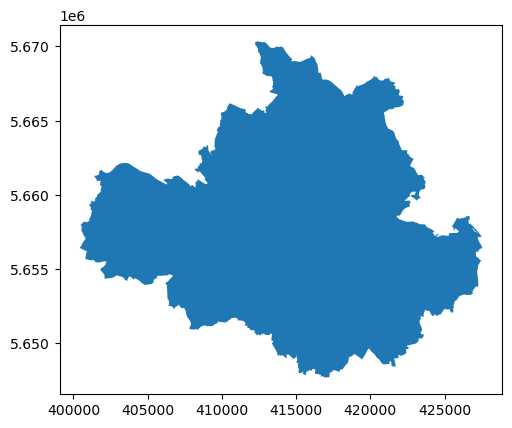

In [3]:
city = ox.geocode_to_gdf(place_name)
ax = ox.projection.project_gdf(city).plot()

In [4]:
# minx, miny, maxx, maxy (left, bottom, right, top)
city.total_bounds

array([13.5793237, 50.974937 , 13.9660626, 51.1777202])

In [5]:
# city_bbox = [13.6864402, 51.0280799, 13.7872926, 51.0766681] # Altstadt, Dresden
city_bbox = [13.5793237, 50.974937 , 13.9660626, 51.1777202] # Dresden

# Get green space area from OSM

## 1. Use landuse key

In [6]:
green_landuse_area = ox.features_from_bbox(city_bbox, 
                                           tags={'landuse': ['allotments',
                                                             'forest',
                                                             'grass',
                                                             'greenfield',
                                                             'meadow',
                                                             'orchard',
                                                             'recreation_ground',
                                                             'village_green',
                                                             'vineyard',
                                                             'cemetery']})

<Axes: >

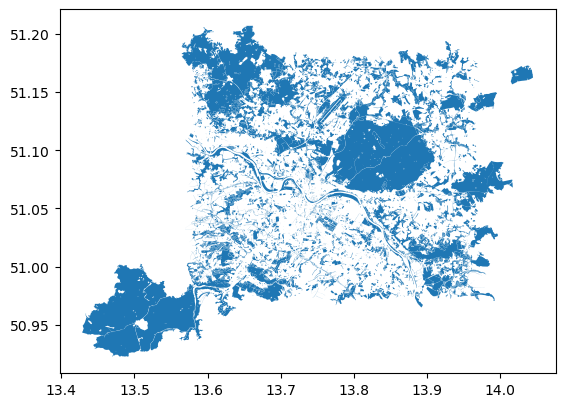

In [7]:
green_landuse_area.plot()

In [8]:
green_landuse_area = green_landuse_area.reset_index()

In [9]:
green_landuse_area.head()

,element,id,geometry,landuse,name,denomination,religion,wikidata,check_date:opening_hours,opening_hours,...,bridge,substance,utility,was:man_made,name:en,level,material,type,name:hsb,source:outline
0,node,593500300,POINT (13.70638 51.15663),meadow,Fasanenwiese,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,593504848,POINT (13.70344 51.15098),forest,Fuchsbruch,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,relation,6128,"MULTIPOLYGON (((13.89557 51.10721, 13.89696 51...",forest,Dresdner Heide,NaN,NaN,Q8905,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,Drježdźanska hola,NaN
3,relation,22720,"MULTIPOLYGON (((13.44983 50.93945, 13.4505 50....",forest,Tharandter Wald,NaN,NaN,Q2409158,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,Tharandtski lěs,NaN
4,relation,51861,"POLYGON ((13.89602 50.98358, 13.89588 50.98344...",meadow,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN,NaN


In [10]:
# green_landuse_area.to_file("../data/raw/osm/green space/green_landuse_area.geojson", driver='GeoJSON')
green_landuse_area.to_file("../data/raw/osm/green space/green_landuse_area_dresden.geojson", driver='GeoJSON')

In [11]:
# print(green_landuse_area[green_landuse_area['landuse']=='allotments'].iloc[0].values)

In [12]:
# green_landuse_area[~(green_landuse_area['barrier'].isna())]

In [13]:
# green_landuse_area[~(green_landuse_area['access'].isna())]['access']

## 2. Use leisure key

In [14]:
green_leisure_area = ox.features_from_bbox(city_bbox, 
                                           tags={'leisure': ['garden',
                                                             'golf_course',
                                                             'nature_reserve',
                                                             'park',
                                                             'pitch',
                                                             'playground']})

<Axes: >

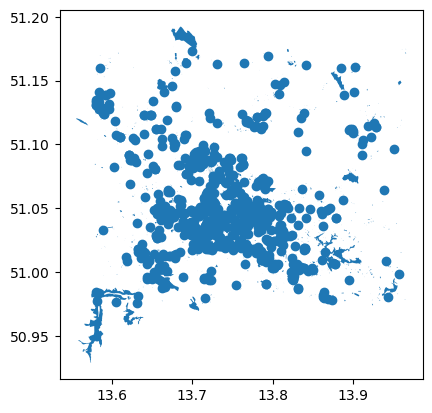

In [15]:
green_leisure_area.plot()

In [16]:
green_leisure_area = green_leisure_area.reset_index()

In [17]:
green_leisure_area.head()

,element,id,geometry,created_by,leisure,wheelchair,access,name,opening_hours,operator,...,material,noname,name:de,pitch:net,pitch:net:material,pitch:net:overhang,construction,operator:short,type,name:fr
0,node,255545201,POINT (13.71593 51.02135),Potlatch 0.8a,playground,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,262693384,POINT (13.77654 51.1137),JOSM,playground,limited,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,266593887,POINT (13.71519 51.0301),NaN,playground,NaN,yes,Würzburger Straße - Park,Mo-Su 08:00-22:00,Landeshauptstadt Dresden,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,269751929,POINT (13.79118 51.1246),NaN,playground,NaN,yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,269949803,POINT (13.58165 50.97735),NaN,playground,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# green_leisure_area.to_file("../data/raw/osm/green space/green_leisure_area.geojson", driver='GeoJSON')
green_leisure_area.to_file("../data/raw/osm/green space/green_leisure_area_dresden.geojson", driver='GeoJSON')

In [19]:
# tiles = "cartodbdarkmatter"
# green_leisure_area.explore(tiles=tiles, color="lime", tooltip="name")

In [20]:
# green_leisure_area[green_leisure_area['leisure']=='garden'].count()

In [21]:
# green_leisure_area[~(green_leisure_area['access'].isna())]['access'].unique()

## 3. Use natural key

In [22]:
green_natural_area = ox.features_from_bbox(city_bbox, 
                                           tags={'natural': ['wood',
                                                             'scrub',
                                                             'heath',
                                                             'grassland',
                                                             'wetland']})

<Axes: >

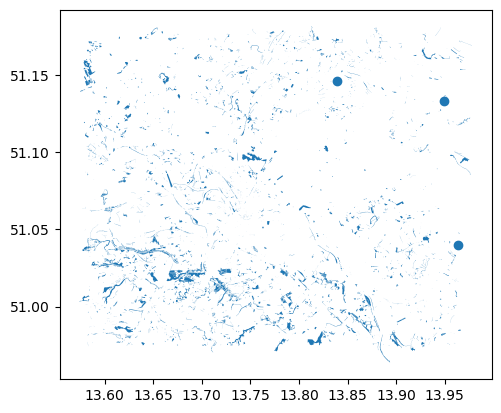

In [23]:
green_natural_area.plot()

In [24]:
green_natural_area = green_natural_area.reset_index()

In [25]:
green_natural_area.head()

,element,id,geometry,natural,wetland,name,source:name,old_name,source,boundary,...,access,comment,area,check_date,area:highway,fee,species:wikipedia,type,nature,protected_area
0,node,2583496631,POINT (13.83905 51.14606),wetland,swamp,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,9042465204,POINT (13.96352 51.03965),wood,NaN,Kirsten Buschgen,Meilenblatt Sachsen 1783,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,9124027180,POINT (13.94931 51.13272),wood,NaN,Der Strang,NaN,Strange Holtz,Meilenblätter Sachsen 1783 Blatt 264,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,relation,9792,"POLYGON ((13.68859 51.01955, 13.68839 51.01901...",wood,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN,NaN
4,relation,10401,"POLYGON ((13.84853 51.05537, 13.84851 51.05572...",wood,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN,NaN


In [26]:
# green_natural_area.to_file("../data/raw/osm/green space/green_natural_area.geojson", driver='GeoJSON')
green_natural_area.to_file("../data/raw/osm/green space/green_natural_area_dresden.geojson", driver='GeoJSON')

## 4. Use tourism key

In [27]:
green_campsite_area = ox.features_from_bbox(city_bbox, 
                                            tags={'tourism': ['camp_site',
                                                              'picnic_site',
                                                              'caravan_site',
                                                              'zoo']})

<Axes: >

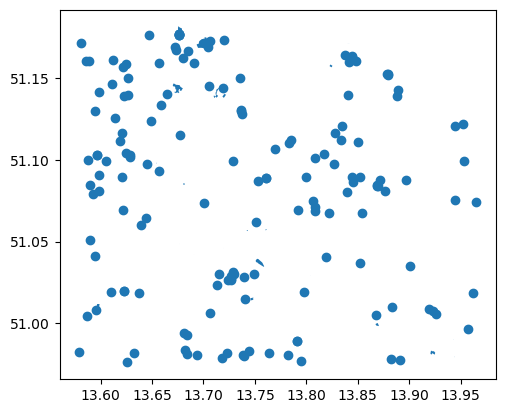

In [28]:
green_campsite_area.plot()

In [29]:
green_campsite_area = green_campsite_area.reset_index()

In [30]:
green_campsite_area.head()

,element,id,geometry,created_by,tourism,access,addr:city,addr:country,addr:housenumber,addr:postcode,...,mobile,motor_vehicle,beds,group_only,guest_house,rooms,attraction,capacity:disabled,seasonal,socket:cee_blue
0,node,257564076,POINT (13.73661 51.12991),JOSM,picnic_site,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,257564078,POINT (13.73708 51.12782),JOSM,picnic_site,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,257922815,POINT (13.73613 51.13039),JOSM,picnic_site,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,257923367,POINT (13.73591 51.14957),NaN,picnic_site,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,258326088,POINT (13.81878 51.04029),NaN,camp_site,private,Dresden,DE,81,01277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# green_campsite_area.to_file("../data/raw/osm/green space/green_campsite_area.geojson", driver='GeoJSON')
green_campsite_area.to_file("../data/raw/osm/green space/green_campsite_area_dresden.geojson", driver='GeoJSON')

# Get POI from OSM

## 1. Use amenity key

In [32]:
poi_amenity_gdf = ox.features_from_bbox(city_bbox, 
                                        tags={'amenity': ['bench',
                                                          'waste_basket']})

<Axes: >

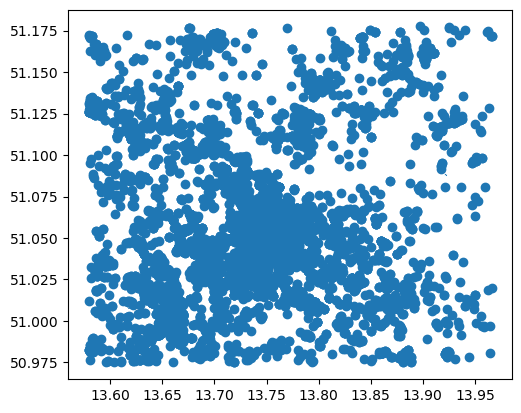

In [33]:
poi_amenity_gdf.plot()

In [34]:
poi_amenity_gdf = poi_amenity_gdf.reset_index()

In [35]:
poi_amenity_gdf.head()

,element,id,geometry,amenity,backrest,description,direction,material,seats,wikimedia_commons,...,not:vending,deposit_ring,support,seats:separated,outdoor_seating,leisure,barrier,height,area,man_made
0,node,251567329,POINT (13.62835 50.98787),bench,yes,Bank am Zickzack-Weg,100,wood,3,File:Bank am Zickzackweg.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,255298026,POINT (13.79864 51.0468),bench,yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,255925960,POINT (13.70218 51.03911),waste_basket,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,257567101,POINT (13.73654 51.17369),bench,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,257934358,POINT (13.71672 51.15674),bench,yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# poi_amenity_gdf.to_file("../data/raw/osm/amenity/poi_amenity.geojson", driver='GeoJSON')
poi_amenity_gdf.to_file("../data/raw/osm/amenity/poi_amenity_dresden.geojson", driver='GeoJSON')

## 2. Use leisure key

In [37]:
poi_leisure_gdf = ox.features_from_bbox(city_bbox, 
                                        tags={'leisure': ['picnic_table',
                                                          'playground']})

<Axes: >

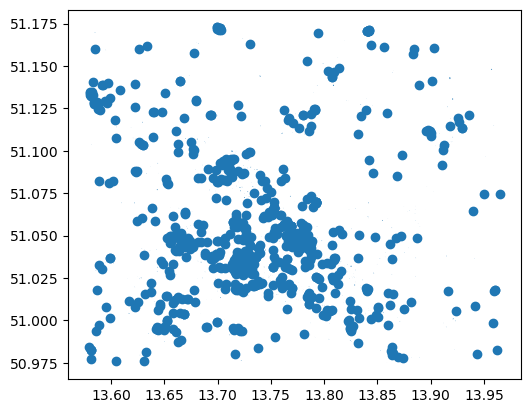

In [38]:
poi_leisure_gdf.plot()

In [39]:
poi_leisure_gdf = poi_leisure_gdf.reset_index()

In [40]:
poi_leisure_gdf.head()

,element,id,geometry,created_by,leisure,wheelchair,access,name,opening_hours,operator,...,pets,playground:springy,fixme,start_date,contact:email,contact:mobile,contact:website,addr:suburb,construction,type
0,node,255545201,POINT (13.71593 51.02135),Potlatch 0.8a,playground,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,262693384,POINT (13.77654 51.1137),JOSM,playground,limited,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,266593887,POINT (13.71519 51.0301),NaN,playground,NaN,yes,Würzburger Straße - Park,Mo-Su 08:00-22:00,Landeshauptstadt Dresden,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,269751929,POINT (13.79118 51.1246),NaN,playground,NaN,yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,269949803,POINT (13.58165 50.97735),NaN,playground,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# poi_leisure_gdf.to_file("../data/raw/osm/amenity/poi_leisure.geojson", driver='GeoJSON')
poi_leisure_gdf.to_file("../data/raw/osm/amenity/poi_leisure_dresden.geojson", driver='GeoJSON')

In [42]:
# poi_leisure_gdf.loc[poi_leisure_gdf.geometry.geometry.type=='Point']

## 3. Use barrier key

barrier=gate and barrier=entrace to help classify public/private area

In [43]:
poi_barrier_gdf = ox.features_from_bbox(city_bbox, 
                                        tags={'barrier': ['gate',
                                                          'entrance']})

In [44]:
poi_barrier_gdf.head()

geometry      access barrier entrance  \
element id                                                                 
node    21637779  POINT (13.66159 51.04829)     private    gate      NaN   
        25231936  POINT (13.64701 51.03492)          no    gate      NaN   
        25693660   POINT (13.6631 51.02003)     private    gate      yes   
        26730567   POINT (13.6995 51.09091)  permissive    gate      NaN   
        26750550  POINT (13.75855 51.07052)     private    gate      NaN   

                 motor_vehicle name description wheelchair foot  \
element id                                                        
node    21637779           NaN  NaN         NaN        NaN  NaN   
        25231936           NaN  NaN         NaN        NaN  NaN   
        25693660           NaN  NaN         NaN        NaN  NaN   
        26730567            no  NaN         NaN        NaN  NaN   
        26750550           NaN  NaN         NaN        NaN  NaN   

                 maxwidth:physical  ... information tourism note:de  \
element id                          ...                               
node    21637779               NaN  ...         NaN     NaN     NaN   
        25231936               NaN  ...         NaN     NaN     NaN   
        25693660               NaN  ...         NaN     NaN     NaN   
        26730567               NaN  ...         NaN     NaN     NaN   
        26750550               NaN  ...         NaN     NaN     NaN   

                 note:access layer open fence_type supervised disused  \
element id                                                              
node    21637779         NaN   NaN  NaN        NaN        NaN     NaN   
        25231936         NaN   NaN  NaN        NaN        NaN     NaN   
        25693660         NaN   NaN  NaN        NaN        NaN     NaN   
        26730567         NaN   NaN  NaN        NaN        NaN     NaN   
        26750550         NaN   NaN  NaN        NaN        NaN     NaN   

                 check_date  
element id                   
node    21637779        NaN  
        25231936        NaN  
        25693660        NaN  
        26730567        NaN  
        26750550        NaN  

[5 rows x 101 columns]

In [45]:
poi_barrier_gdf = poi_barrier_gdf.reset_index()

In [46]:
# poi_barrier_gdf.to_file("../data/raw/osm/amenity/poi_barrier.geojson", driver='GeoJSON')
poi_barrier_gdf.to_file("../data/raw/osm/amenity/poi_barrier_dresden.geojson", driver='GeoJSON')

# Get road network, cycleway, and footpath

## 1. Get road network

In [47]:
# road_network_gdf = ox.features_from_bbox(city_bbox, 
#                                          tags={'highway': ['primary',
#                                                            'secondary',
#                                                            'tertiary',
#                                                            'residential']})

In [48]:
# road_network_gdf.plot()

In [49]:
# road_network_gdf = road_network_gdf.reset_index()

In [50]:
# road_network_gdf.head()

In [51]:
# road_network_gdf.to_file("../data/raw/osm/network/road_network.geojson", driver='GeoJSON')

In [52]:
road_network = ox.graph_from_bbox(city_bbox, network_type='drive_service')
# road_network = ox.graph_from_bbox(city_bbox, network_type='drive')

In [53]:
# ox.plot_graph(road_network)

In [54]:
nodes, edges = ox.graph_to_gdfs(road_network)

In [55]:
# m = edges.explore(color="skyblue", tiles="cartodbdarkmatter")
# nodes.explore(m=m, color="pink", marker_kwds={"radius": 6})

In [56]:
nodes = nodes.reset_index()
edges = edges.reset_index()

In [57]:
edges.columns

Index(['u', 'v', 'key', 'osmid', 'highway', 'maxspeed', 'name', 'oneway',
       'reversed', 'length', 'geometry', 'service', 'lanes', 'bridge', 'width',
       'ref', 'access', 'junction', 'tunnel', 'est_width', 'area'],
      dtype='object')

In [58]:
edges.explode('osmid')['access'].astype(str).unique()

array(['nan', 'yes', 'no', 'permissive', "['permissive', 'destination']",
       'customers', 'delivery', 'destination', "['yes', 'permissive']",
       "['destination', 'customers']", 'bus', 'emergency', 'permit',
       'unknown', 'designated', "['permissive', 'customers']",
       "['permissive', 'designated']", "['yes', 'no']", 'psv'],
      dtype=object)

In [59]:
nodes.head()

,osmid,y,x,street_count,highway,ref,junction,railway,geometry
0,442734,51.016632,13.736979,3,NaN,NaN,NaN,NaN,POINT (13.73698 51.01663)
1,442736,51.016695,13.739391,3,NaN,NaN,NaN,NaN,POINT (13.73939 51.01669)
2,442740,51.017931,13.741516,3,NaN,NaN,NaN,NaN,POINT (13.74152 51.01793)
3,442743,51.015686,13.740170,3,NaN,NaN,NaN,NaN,POINT (13.74017 51.01569)
4,442746,51.017063,13.735259,3,NaN,NaN,NaN,NaN,POINT (13.73526 51.01706)


In [60]:
edges['highway'].dtype

dtype('O')

Note: there is the case that highway or other attribute values is *'list'* due to topology clean-up of osmnx

In [61]:
# nodes.to_file("../data/raw/osm/network/road network/road_network_nodes.geojson", driver='GeoJSON')
# edges.to_file("../data/raw/osm/network/road network/road_network_edges.geojson", driver='GeoJSON')

nodes.to_file("../data/raw/osm/network/road network/road_network_nodes_dresden.geojson", driver='GeoJSON')
edges.to_file("../data/raw/osm/network/road network/road_network_edges_dresden.geojson", driver='GeoJSON')

In [62]:
# nodes['junction'].unique()

## 2. Get cycleway

In [63]:
cycle_network = ox.graph_from_bbox(city_bbox, network_type='bike')

In [64]:
# ox.plot_graph(cycle_network)

In [65]:
cycle_nodes, cycle_edges = ox.graph_to_gdfs(cycle_network)

In [66]:
cycle_nodes = cycle_nodes.reset_index()
cycle_edges = cycle_edges.reset_index()

In [67]:
cycle_nodes.head()

,osmid,y,x,street_count,highway,junction,railway,ref,geometry
0,442734,51.016632,13.736979,3,NaN,NaN,NaN,NaN,POINT (13.73698 51.01663)
1,442736,51.016695,13.739391,3,NaN,NaN,NaN,NaN,POINT (13.73939 51.01669)
2,442738,51.017268,13.740166,3,NaN,NaN,NaN,NaN,POINT (13.74017 51.01727)
3,442740,51.017931,13.741516,3,NaN,NaN,NaN,NaN,POINT (13.74152 51.01793)
4,442743,51.015686,13.740170,3,NaN,NaN,NaN,NaN,POINT (13.74017 51.01569)


In [68]:
cycle_edges.head()

,u,v,key,osmid,highway,maxspeed,name,oneway,reversed,length,...,service,lanes,bridge,width,ref,access,junction,tunnel,est_width,area
0,442734,1839778041,0,1338016415,residential,30,Altpestitz,False,True,72.940783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,442734,442736,0,92,residential,30,Eigenheimstraße,False,False,169.821618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,442734,9907191675,0,105,residential,30,Altpestitz,False,False,55.779311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,442736,442738,0,92,residential,30,Eigenheimstraße,False,False,85.329804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,442736,442734,0,92,residential,30,Eigenheimstraße,False,True,169.821618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note: there is the case that highway or other attribute values is *'list'* due to topology clean-up of osmnx

In [69]:
# cycle_nodes.to_file("../data/raw/osm/network/cycle network/cycle_network_nodes.geojson", driver='GeoJSON')
# cycle_edges.to_file("../data/raw/osm/network/cycle network/cycle_network_edges.geojson", driver='GeoJSON')

cycle_nodes.to_file("../data/raw/osm/network/cycle network/cycle_network_nodes_dresden.geojson", driver='GeoJSON')
cycle_edges.to_file("../data/raw/osm/network/cycle network/cycle_network_edges_dresden.geojson", driver='GeoJSON')

## 3. Get footpath

In [70]:
footpath_network = ox.graph_from_bbox(city_bbox, network_type='walk')

In [71]:
# ox.plot_graph(footpath_network)

In [72]:
footpath_nodes, footpath_edges = ox.graph_to_gdfs(footpath_network)

In [73]:
footpath_nodes = footpath_nodes.reset_index()
footpath_edges = footpath_edges.reset_index()

In [74]:
footpath_nodes.head()

,osmid,y,x,street_count,highway,junction,railway,ref,geometry
0,442734,51.016632,13.736979,3,NaN,NaN,NaN,NaN,POINT (13.73698 51.01663)
1,442736,51.016695,13.739391,3,NaN,NaN,NaN,NaN,POINT (13.73939 51.01669)
2,442738,51.017268,13.740166,3,NaN,NaN,NaN,NaN,POINT (13.74017 51.01727)
3,442740,51.017931,13.741516,3,NaN,NaN,NaN,NaN,POINT (13.74152 51.01793)
4,442743,51.015686,13.740170,3,NaN,NaN,NaN,NaN,POINT (13.74017 51.01569)


In [75]:
footpath_edges.head()

,u,v,key,osmid,highway,maxspeed,name,oneway,reversed,length,...,service,lanes,bridge,access,width,ref,junction,est_width,tunnel,area
0,442734,1839778041,0,1338016415,residential,30,Altpestitz,False,True,72.940783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,442734,442736,0,92,residential,30,Eigenheimstraße,False,False,169.821618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,442734,9907191675,0,105,residential,30,Altpestitz,False,False,55.779311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,442736,442738,0,92,residential,30,Eigenheimstraße,False,False,85.329804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,442736,442734,0,92,residential,30,Eigenheimstraße,False,True,169.821618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note: there is the case that highway or other attribute values is *'list'* due to topology clean-up of osmnx

In [76]:
# footpath_nodes.to_file("../data/raw/osm/network/footpath network/footpath_network_nodes.geojson", driver='GeoJSON')
# footpath_edges.to_file("../data/raw/osm/network/footpath network/footpath_network_edges.geojson", driver='GeoJSON')

footpath_nodes.to_file("../data/raw/osm/network/footpath network/footpath_network_nodes_dresden.geojson", driver='GeoJSON')
footpath_edges.to_file("../data/raw/osm/network/footpath network/footpath_network_edges_dresden.geojson", driver='GeoJSON')

# Test getting path density/path length of each polygon

In [589]:
green_landuse_area_utm = green_landuse_area.to_crs(32632)

In [590]:
green_landuse_area_utm['total_area'] = green_landuse_area_utm.area

In [591]:
green_landuse_area_utm['geometry'].count()

2365

In [592]:
green_landuse_area_utm[green_landuse_area_utm['total_area'] > 100]['geometry'].count()

1727

In [593]:
green_landuse_area_utm_filter = green_landuse_area_utm[green_landuse_area_utm['total_area'] > 100]

MultiPolygon


/root/miniforge3/envs/pugs-detection-new/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


{'n': 1806, 'm': 5392, 'k_avg': 5.971207087486158, 'edge_length_total': 660296.9224488719, 'edge_length_avg': 122.4586280506068, 'streets_per_node_avg': 3.111295681063123, 'streets_per_node_counts': {0: 0, 1: 159, 2: 0, 3: 1170, 4: 441, 5: 30, 6: 6}, 'streets_per_node_proportions': {0: 0.0, 1: 0.08803986710963455, 2: 0.0, 3: 0.6478405315614618, 4: 0.2441860465116279, 5: 0.016611295681063124, 6: 0.0033222591362126247}, 'intersection_count': 1647, 'street_length_total': 330148.4612244366, 'street_segment_count': 2696, 'street_length_avg': 122.45862805060705, 'circuity_avg': 1.041389569612538, 'self_loop_proportion': 0.000741839762611276}


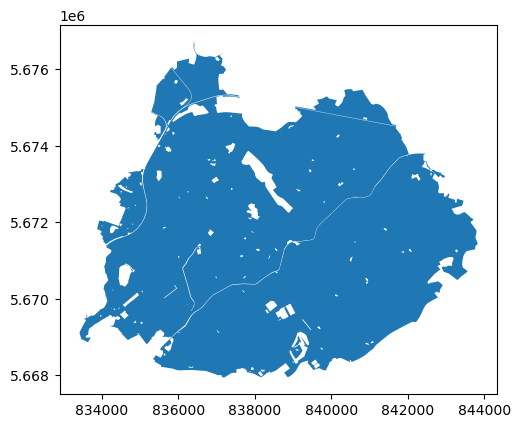

In [594]:
for index, row in green_landuse_area_utm_filter.iterrows():
    print(row['geometry'].geom_type)
    if 'Polygon' in row['geometry'].geom_type:
        green_landuse_area_utm_filter[green_landuse_area_utm_filter['geometry'] == row['geometry']].plot()
        latlng_geom, _ = ox.projection.project_geometry(row['geometry'], crs={'init':'epsg:32632'}, to_latlong=True)
        temp_graph = ox.graph_from_polygon(latlng_geom, network_type='walk')
        stats = ox.basic_stats(temp_graph)
        print(stats)
        break